In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math 
import pandas as pd

In [2]:

import timeit

start = timeit.timeit()
print("time")
end = timeit.timeit()
print(end - start)

time
0.0795510999999749


In [3]:
def laminar(R):
    return 64/(R)

In [4]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=laminar(Ra)
        D=laminar(Ra)
        E=laminar(Ra)
        F=laminar(Ra)
        G=laminar(Ra)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=laminar(Ra)
        D=laminar(Ra)
        E=laminar(Ra)
        F=laminar(Ra)
        G=laminar(Ra)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

laminartime =(end - start)/1000


time
-9.569999997438571e-08


In [7]:
import pandas as pd

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def clamond(R,k,d):
    eD=k/d
    x1=eD*(R)* 0.123968186335417556;
    x2=(np.log(R))-0.779397488455682028;

    f = x2 - 0.2;
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    f = 1.151292546497022842/f;                   
    f = f*f;   
    return f 

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=clamond(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        return f

def ClamondFluid(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        return f
    
def MethodRMS(R):
        rms=sum(np.absolute((Fluidflowx(R,0.01,1)-ClamondFluid(R,0.01,1))))/len(R)
        print(rms)
        return rms

MethodRMS(Ra)

lrms = MethodRMS(Ra)
    
timetest = [('Laminar',lrms, laminartime)]

dfObj = pd.DataFrame(timetest,
                     columns=['Method','RMS','Time'])
print(dfObj)

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


nan
nan
    Method  RMS          Time
0  Laminar  NaN -9.570000e-08


In [8]:
newDfObj = dfObj.append({'Method': 'Laminar',
                         'RMS':lrms,
                         'Time': laminartime
                        }, ignore_index=True)
print(newDfObj)

    Method  RMS          Time
0  Laminar  NaN -9.570000e-08
1  Laminar  NaN -9.570000e-08


In [9]:
def clamond(R,k,d):
    eD=k/d
    x1=eD*(R)* 0.123968186335417556;
    x2=(np.log(R))-0.779397488455682028;

    f = x2 - 0.2;
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    f = 1.151292546497022842/f;                   
    f = f*f;   
    return f 

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=clamond(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        return f

def ClamondFluid(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamond(R,k,d)*((R > 4000))
        return f
    
def MethodRMS(R):
        rms=sum(np.absolute((Fluidflowx(R,0.01,1)-ClamondFluid(R,0.01,1))))/len(R)
        print(rms)
        return rms

In [10]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

clamondtime =(end - start)/1000

rms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'DP Clamond',
                            'RMS':rms,
                            'Time': clamondtime}, ignore_index=True)




C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


time
-3.2780000003640453e-07
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


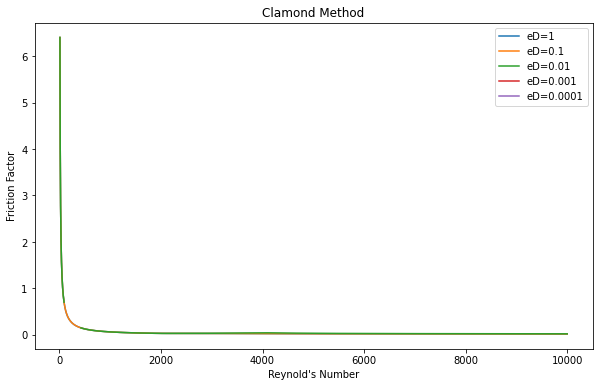

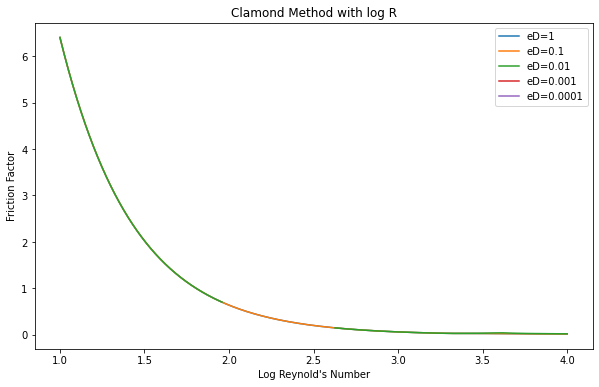

In [11]:
     
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)


plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Clamond Method')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Clamond Method with log R')
plt.legend()
plt.show()

In [12]:
def clamondsp(R,k,d):
    eD=k/d
    x1=eD*(R)* 0.123968186335417556;
    x2=(np.log(R))-0.779397488455682028;

    f = x2 - 0.2;
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    f = 1.151292546497022842/f;                   
    f = f*f;   
    return f 

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=clamondsp(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+clamondsp(R,k,d)*((R > 4000))
        return f

In [13]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'SP. Clamond',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)



time
2.804999999170832e-07
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


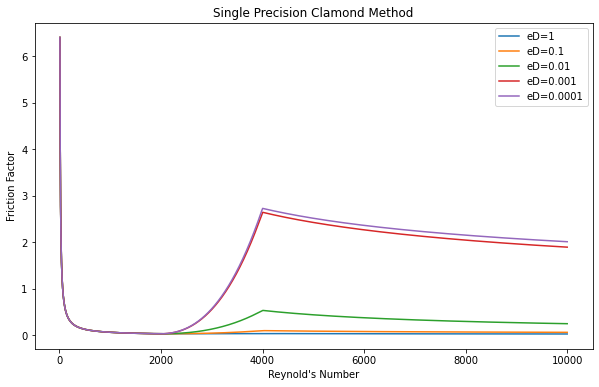

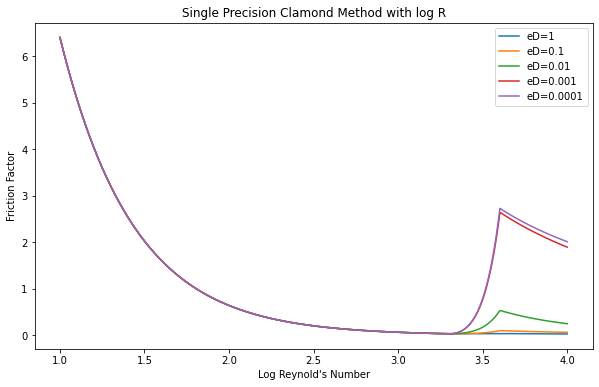

In [14]:
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)

plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Single Precision Clamond Method')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Single Precision Clamond Method with log R')
plt.legend()
plt.show()

In [15]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f


In [16]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Brkic',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
3.263979999996991e-05
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


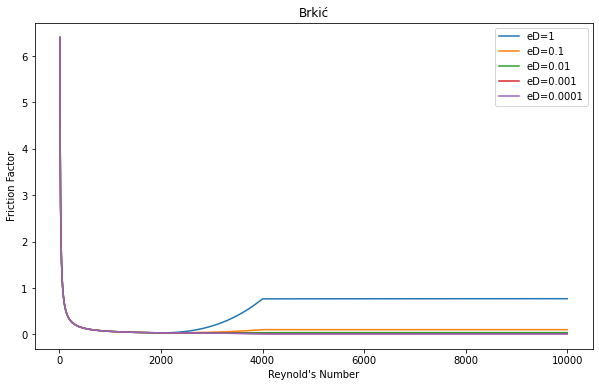

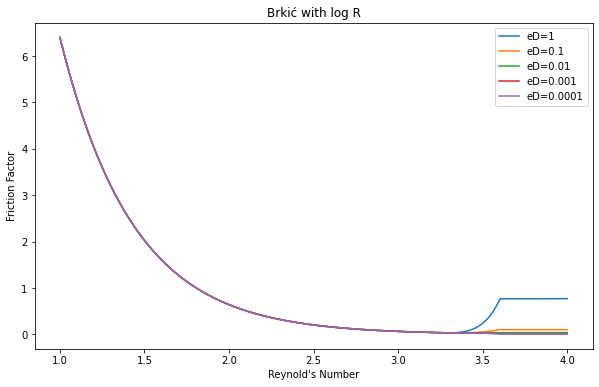

In [17]:

timeit.timeit("import time; time.sleep(1)", number=1)
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Brkić')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Brkić with log R')
plt.legend()
plt.show()



In [18]:
def JainSwamee(R,k,d):
    eD=k/d
    f=-2*np.log10((eD/(3715))+(5.74/(R)**0.9))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=JainSwamee(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+JainSwamee(R,k,d)*((R > 4000))
        return f

In [19]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'JainSwamee',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
2.7012099999865313e-05
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


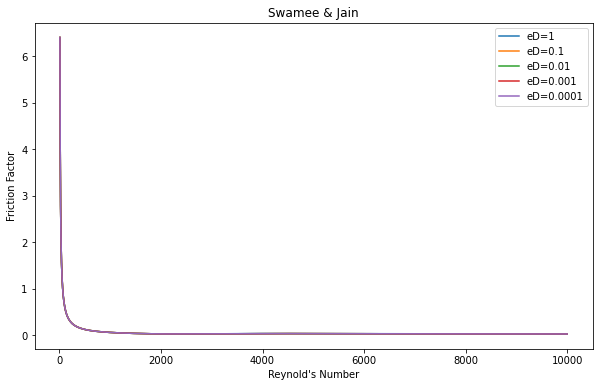

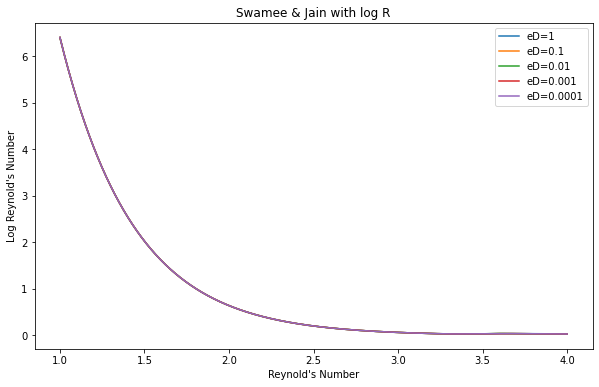

In [20]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
       

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Swamee & Jain')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Log Reynold's Number")
plt.title('Swamee & Jain with log R')
plt.legend()
plt.show()
                      


In [21]:
def Serghides1(R,k,d):
    eD=k/d
    psi1=-2*np.log10(eD/3.7)+12/R
    psi2=-2*np.log10(eD/3.7)+(2.51*psi1)/R
    psi3=-2*np.log10(eD/3.7)+(2.51*psi2)/R
    f=(psi1-((psi1-psi1)**2)/(psi3-2*psi2+psi1))**(-2)
    return f


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Serghides1(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Serghides1(R,k,d)*((R > 4000))
        return f


In [22]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Serghides1',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
2.8824899999790433e-05
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


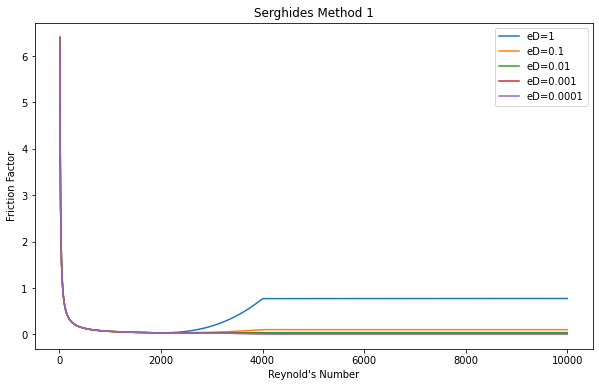

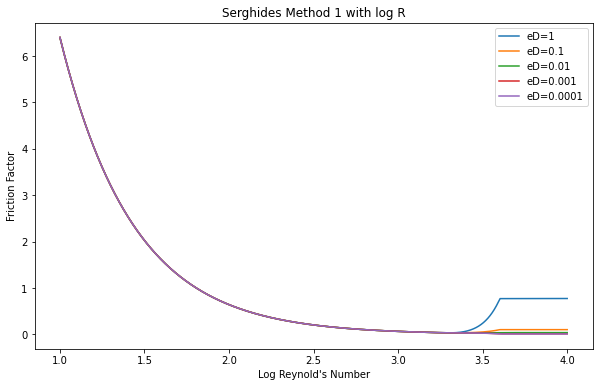

In [23]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 1')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 1 with log R')
plt.legend()
plt.show()
                      

In [24]:
def Serghides2(R,k,d):
    eD=k/d
    psi1=-2*np.log10(eD/3.7)+12/R
    psi2=-2*np.log10(eD/3.7)+(2.51*psi1)/R
    psi3=-2*np.log10(eD/3.7)+(2.51*psi2)/R
    f=(4.781-((psi2-4.781)**2)/(psi3-2*psi2+4.781))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Serghides2(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Serghides2(R,k,d)*((R > 4000))
        return f

In [25]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Serghides2',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
-1.4073999996071506e-06
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


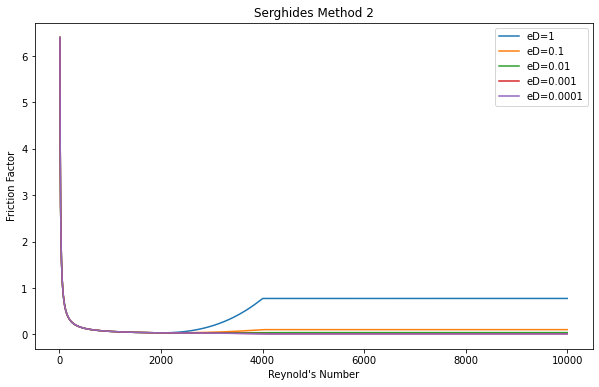

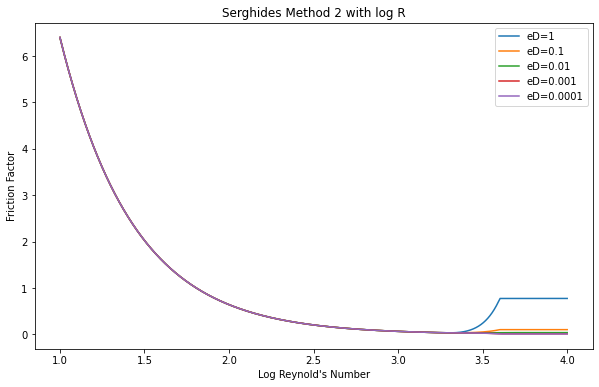

In [26]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

        
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 2')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Serghides Method 2 with log R')
plt.legend()
plt.show()
                      

In [27]:
def Dobromyslov(R,k,d):
    eD=k/d
    Rekv=500*(eD)
    B=(1+(np.log10(R)/np.log10(Rekv)))
    b=B*(B <= 2)+2*(B > 2)
    V=np.log10(3.7*eD)
    f=(0.5/V)*((b/2+(1.312*(2-b)*V)/(np.log10(R)-1)))
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Dobromyslov(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Dobromyslov(R,k,d)*((R > 4000))
        return f

In [28]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Dobromyslov',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


time
1.291000003220688e-07
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


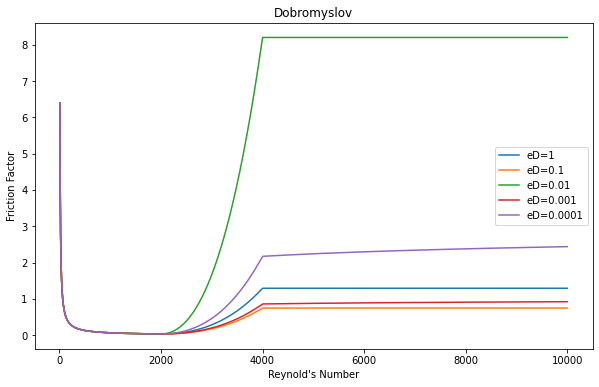

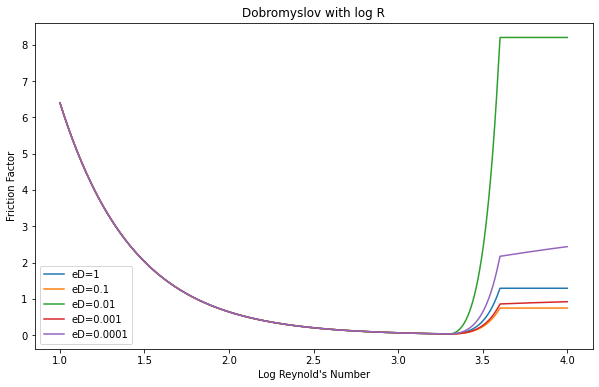

In [29]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
 

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Dobromyslov')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Dobromyslov with log R')
plt.legend()
plt.show()
 

In [30]:
def GoudarSonnad1(R,k,d):
    eD=k/d
    S=0.124*(R)*(eD)+np.log(0.4587*(R))
    T=(S/(S+1))
    F=0.8686*np.log((0.4587*(R))/((S-0.31)**T))
    f=1/(F*F)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=GoudarSonnad1(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+GoudarSonnad1(R,k,d)*((R > 4000))
        return f

In [31]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'GoudarSonnad1',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
3.145599999697879e-06
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


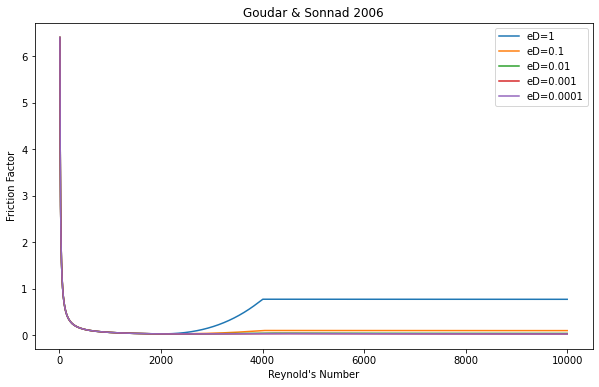

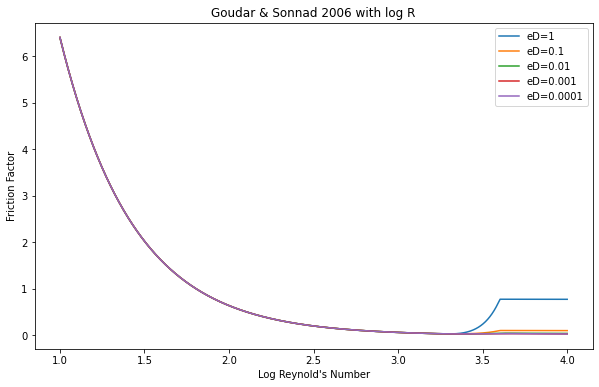

In [32]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1       

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2006')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2006 with log R')
plt.legend()
plt.show()
                      

In [33]:
def GoudarSonnad2(R,k,d):
    eD=k/d
    a=2/(np.log(10))
    b=eD/3.7
    da=np.log(10)*(R)/5.02
    s=b*da*np.log(da)
    q=s/(s**(s+1))
    g=b*da+np.log(d/q)
    z=np.log(q/g)
    dla=z*(g/(g+1)) 
    dcfa=dla*((1+((z/2)/((g+1)**2+(z/3)*(2*g-1)))))
    f=a-(np.log(da/q)+dcfa)
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=GoudarSonnad2(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+GoudarSonnad2(R,k,d)*((R > 4000))
        return f


In [34]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'GoudarSonnad2',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning

time
-3.6168000001453037e-06
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning

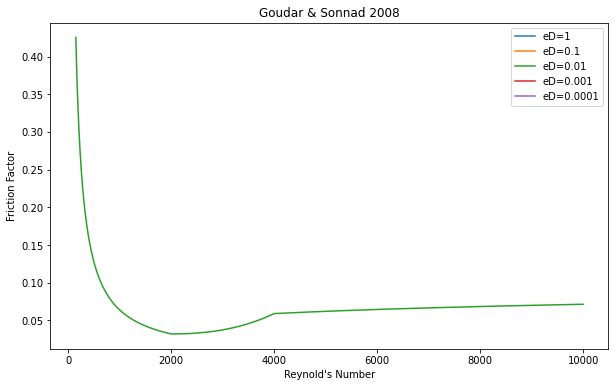

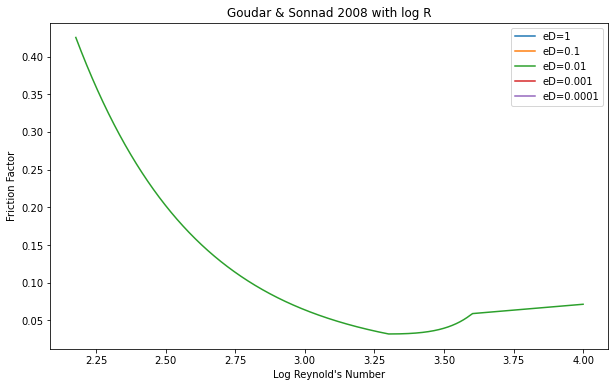

In [35]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2008')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Goudar & Sonnad 2008 with log R')
plt.legend()
plt.show()
                      

In [36]:
def Blasius(R,k):
    f=0.316/(R**(1/4))*(k==0)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Blasius(X2,k)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Blasius(R,k)*((R > 4000))
        return f


In [37]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Blasius',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
3.4458299999641897e-05
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


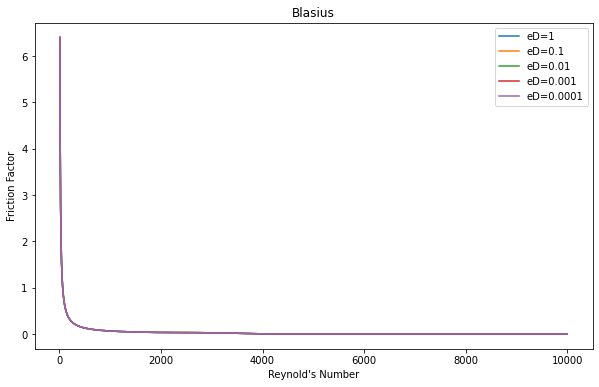

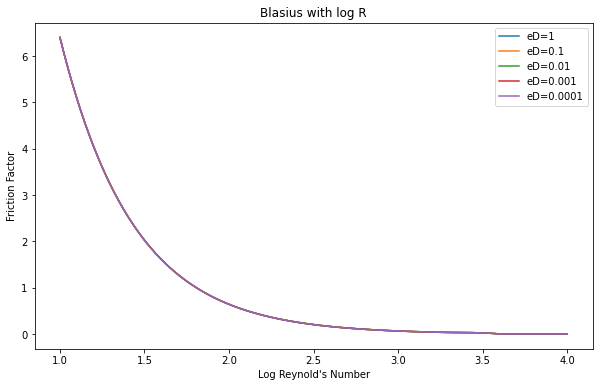

In [38]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
      

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Blasius')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Blasius with log R')
plt.legend()
plt.show()
                      

In [39]:
def haaland(R,k,d):
    eD=k/d
    f=-1.8*(np.log10(eD/3.7**1.11+69/R))
    f=1/(f*f)
    return f  


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=haaland(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+haaland(4000,k,d)*((R > 4000))
        return f


In [40]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Haaland',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
-8.809999999357387e-07
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


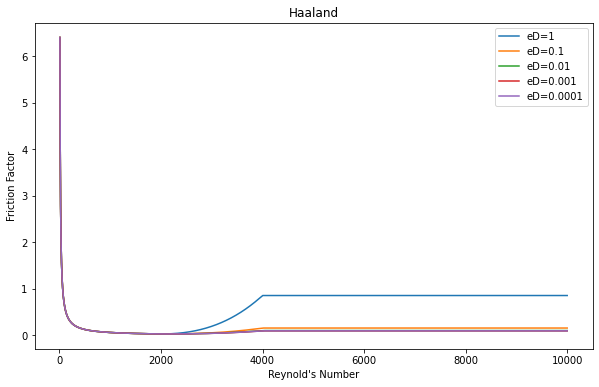

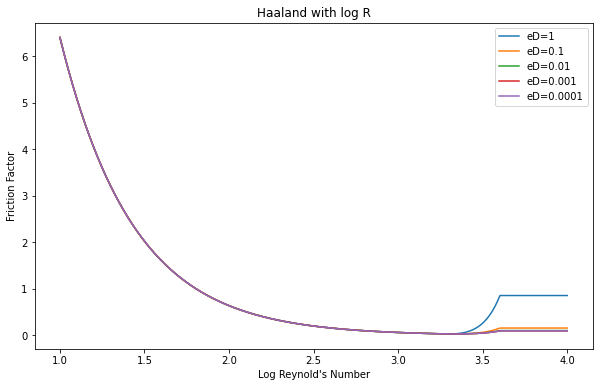

In [41]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Haaland')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Haaland with log R')
plt.legend()
plt.show()
                      

In [42]:
def Buzzelli(R,k,d):
    eD=k/d
    alpha=(0.744*np.log(R)-1.41)/(1+1.32*eD)
    beta=(R)*(eD/3.7)+2.51*alpha
    f=alpha-((alpha+2*np.log10(beta/(R)))/(1+2.18/beta))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Buzzelli(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Buzzelli(4000,k,d)*((R > 4000))
        return f


In [43]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Buzzelli',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
-4.1381999999430265e-06
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


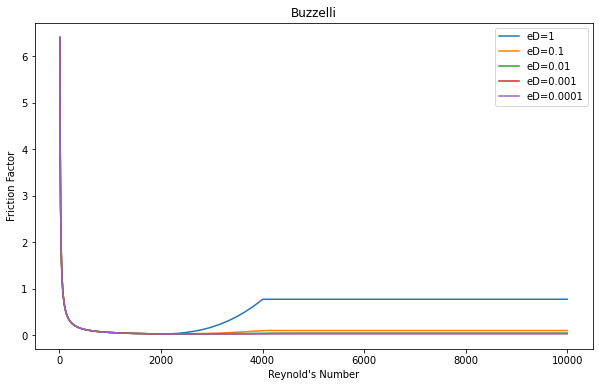

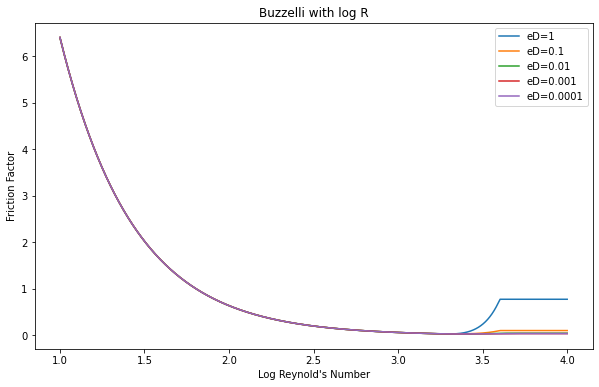

In [44]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Buzzelli')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Buzzelli with log R')
plt.legend()
plt.show()


In [45]:

def MonzonRomeoRoyo(R,k,d):
    eD=k/d
    f=-2*np.log10(eD/3.7)-(5.0272/(R))*np.log10(eD/3.827)*(4.657/(R))*np.log10(eD/(7.7918)**0.09924+(5.3326/(208.815+(R)))**0.9345)
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=MonzonRomeoRoyo(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+MonzonRomeoRoyo(4000,k,d)*((R > 4000))
        return f

In [46]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'MRR',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
1.6140199999881587e-05
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


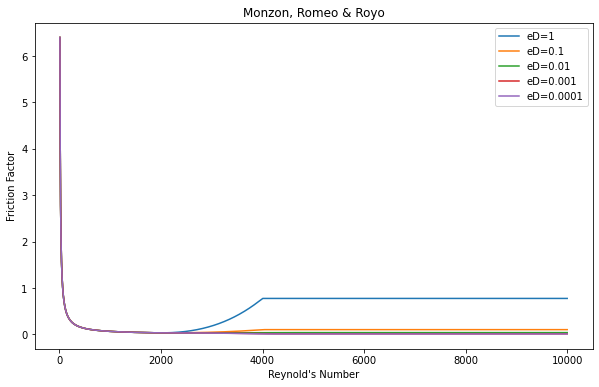

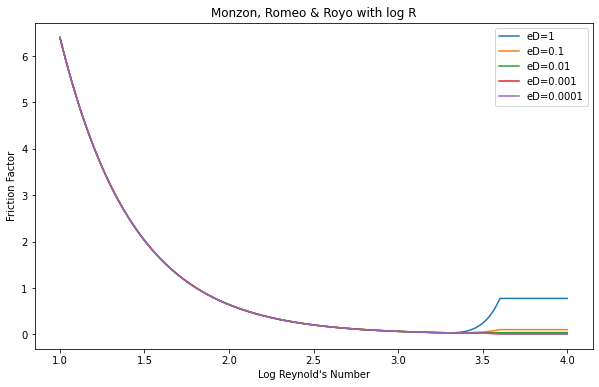

In [47]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Monzon, Romeo & Royo')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Monzon, Romeo & Royo with log R')
plt.legend()
plt.show()
                      

In [48]:

def moody(R,k,d):
    eD=k/d
    f=0.0055*(1+(2*(10**4)*(eD)+(10**6)/(R))**(1/3))
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=moody(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+moody(4000,k,d)*((R > 4000))
        return f

In [49]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Moody',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
4.278000001249893e-07
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


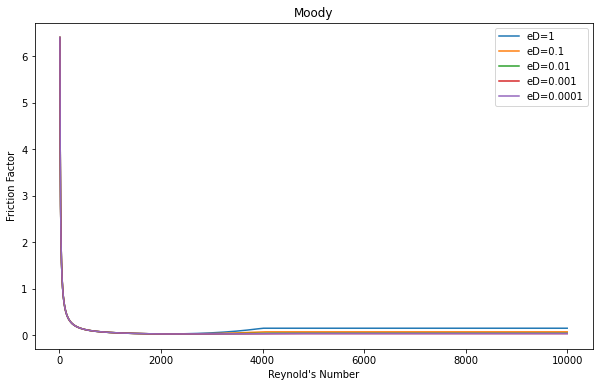

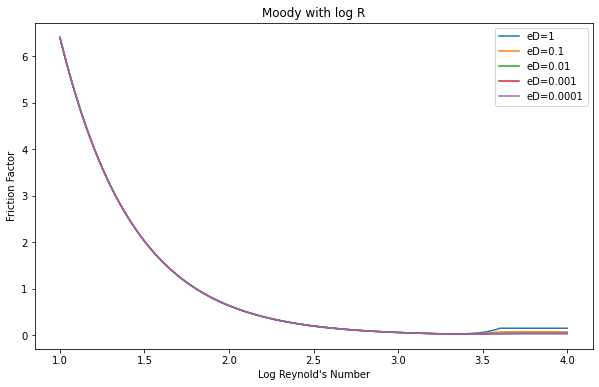

In [50]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Moody')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Moody with log R')
plt.legend()
plt.show()


In [51]:
def Vatankhan(R,k,d):
    eD=k/d
    S=0.124*(R)*(eD)+np.log10(0.4587*(R))
    f=0.8686*np.log10((0.4587*(R)/(S-0.31))**(S/(S+0.9633)))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Vatankhan(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Vatankhan(4000,k,d)*((R > 4000))
        return f

In [52]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Vatankhan',
                         'Time': time}, ignore_index=True)

time
-5.785999996987812e-07
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


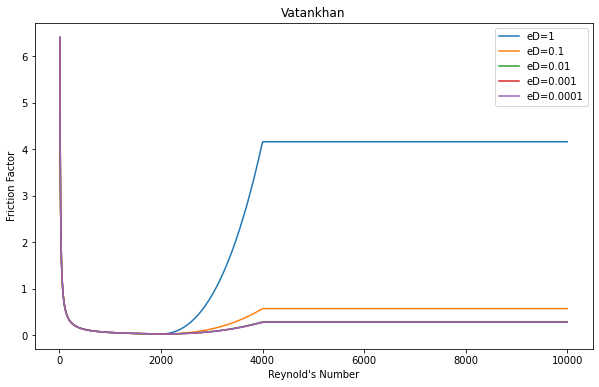

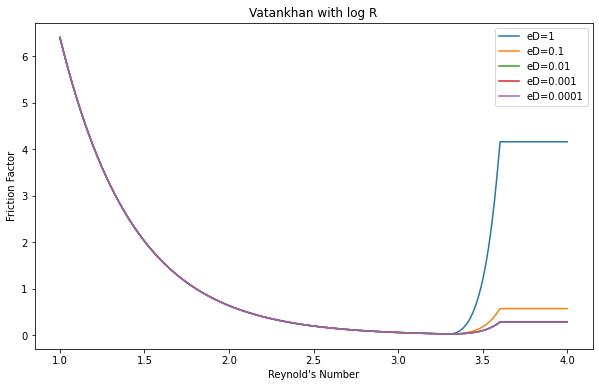

In [53]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Vatankhan')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Vatankhan with log R')
plt.legend()
plt.show()
                      

In [54]:
def EPT(R,k,d):
    eD=k/d
    f=(0.2479-0.0000947*(7-(np.log10(R)**4)/(np.log10(eD/3.615)+(7.366/(R**0.9142)))))
    return f
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=EPT(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+EPT(4000,k,d)*((R > 4000))
        return f

In [55]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'EPT',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
3.3429000000523956e-05
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


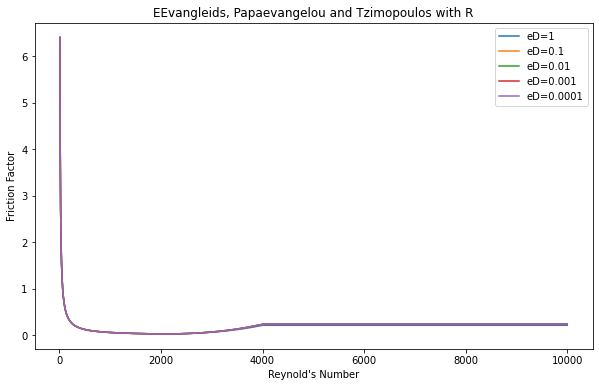

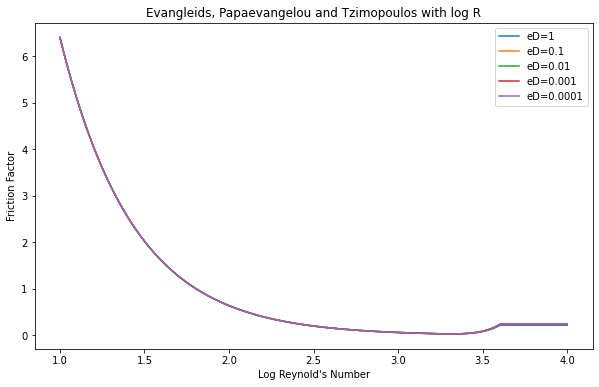

In [56]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1


C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('EEvangleids, Papaevangelou and Tzimopoulos with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Evangleids, Papaevangelou and Tzimopoulos with log R')
plt.legend()
plt.show()
                      

In [57]:
def RaoKumar(R,k,d):
    eD=k/d
    a=0.444
    b=0.135
    fRe=1-0.55*np.exp(-.33*(np.log(R/6.5))**2)
    B=((a+b*(R))/(R))*fRe
    f=2*np.log(eD/2*B)
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=RaoKumar(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+RaoKumar(4000,k,d)*((R > 4000))
        return f

In [58]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'RaoKumar',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
2.700999998523912e-07
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


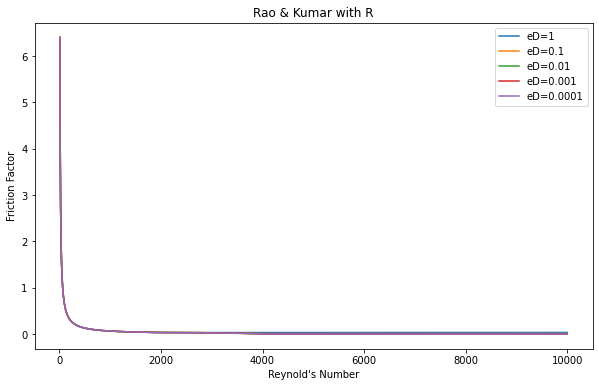

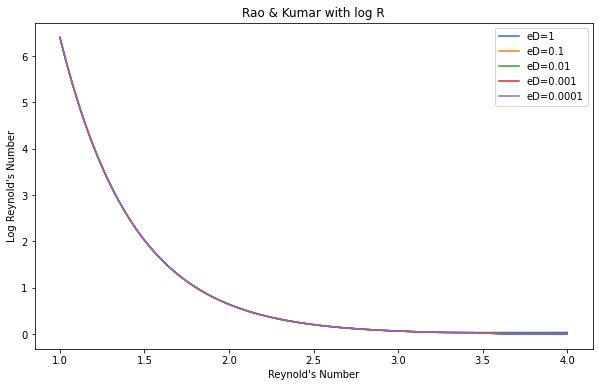

In [59]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1


C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Rao & Kumar with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Log Reynold's Number")
plt.title('Rao & Kumar with log R')
plt.legend()
plt.show()
                      

In [60]:

def Mandilli(R,k,d):
    eD=k/d
    p=2*np.log10(eD/3.7)+(95/(R**0.983))-(96.82/R)
    f=1/(p*p)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Mandilli(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Mandilli(4000,k,d)*((R > 4000))
        return f

In [61]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Mandilli',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
1.344499999504478e-06
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


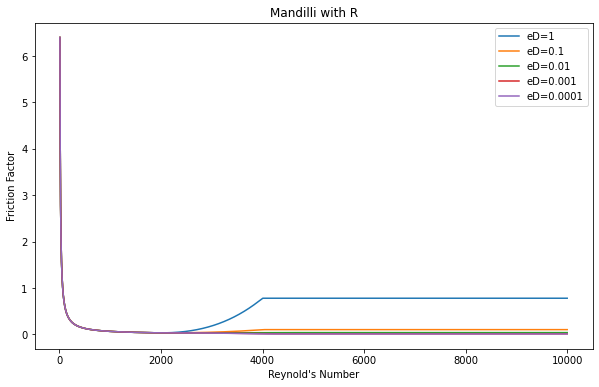

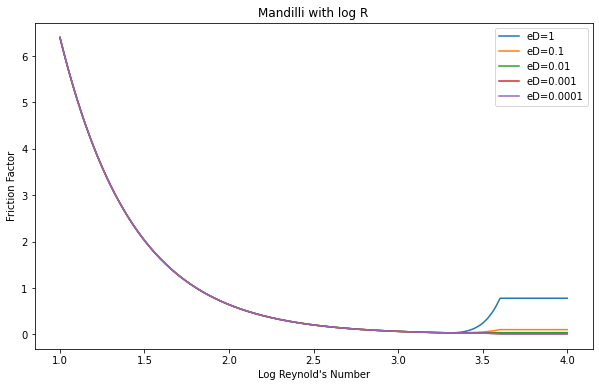

In [62]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1


C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Mandilli with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Mandilli with log R')
plt.legend()
plt.show()
                      

In [63]:
def nikuradse(R):
    f=0.0032+0.2211/((R)**0.237)
    return f
  
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=nikuradse(X2)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+nikuradse(4000)*((R > 4000))
        return f

In [64]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'Nikuradse',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
-6.848999996691418e-07
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


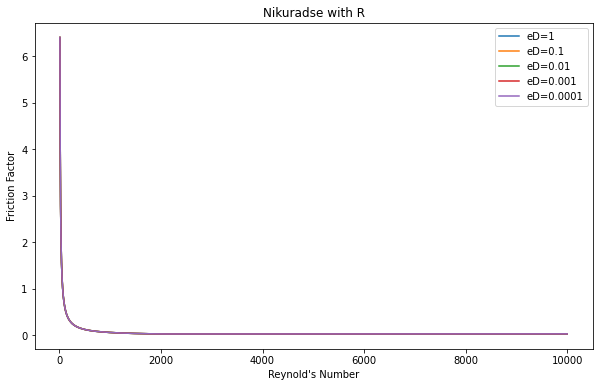

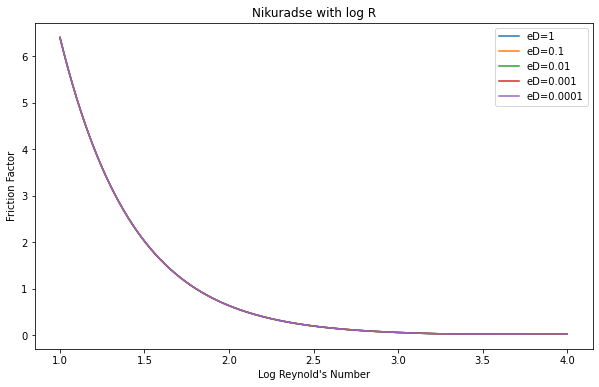

In [65]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

        
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Nikuradse with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Nikuradse with log R')
plt.legend()
plt.show()
                      

In [66]:

def ZigrangSylvester1(R,k,d):
    eD=k/d
    f=2*np.log10(eD/(3.7+(5.02/(R))*np.log10(eD/3.7)-(5.02/(R))*(np.log10(eD/(3.7)+13/(R)))))
    f=1/(f*f)
    return f
                                         
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=ZigrangSylvester1(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+ZigrangSylvester1(4000,k,d)*((R > 4000))
        return f

In [67]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'ZigrangSylvester1',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
-5.658000004586938e-07
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


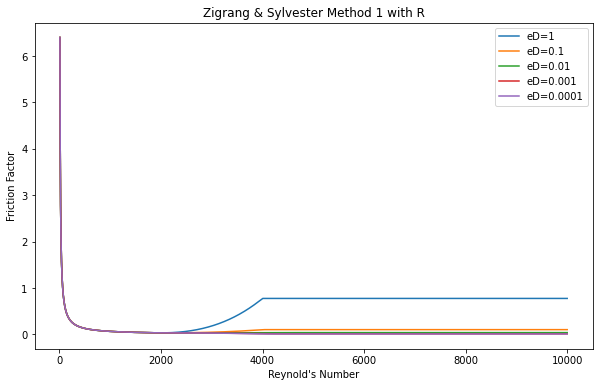

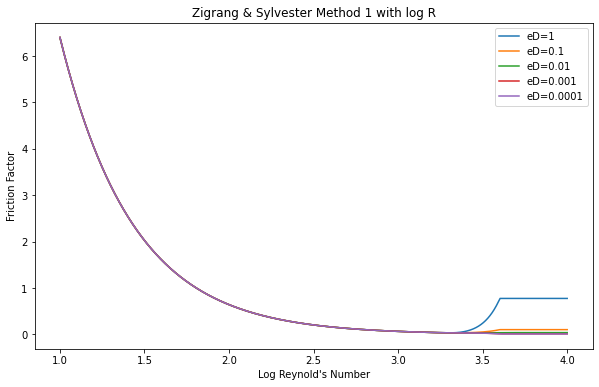

In [68]:

Ra=np.arange(10, 10000, .1);
k=0.01
d=1

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 1 with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 1 with log R')
plt.legend()
plt.show()
                      


In [69]:
def ZigrangSylvester2(R,k,d):
    eD=k/d
    f=2*np.log(eD/3.7)+(5.02/R)*(np.log(eD/3.7)+13/R)
    f=1/(f*f)
    return f

                                         
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=ZigrangSylvester2(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+ZigrangSylvester2(4000,k,d)*((R > 4000))
        return f

In [70]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1

def timecode(Ra,k,d):
       i=1
       while i<1000:
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        i += 1
       else :
        Ra=np.arange(10, 10000, .1);
        k=0.01
        d=1
        C=Fluidflowx(Ra,k,d)
        D=Fluidflowx(Ra,10*k,d)
        E=Fluidflowx(Ra,0.01*k,d)
        F=Fluidflowx(Ra,100*k,d)
        G=Fluidflowx(Ra,0.001*k,d)
        
start = timeit.timeit()
timeit.timeit("import time; time.sleep(1)", number=1)

timecode(Ra,k,d)
print("time")
end = timeit.timeit()
print((end - start)/1000)

time =(end - start)/1000

nrms=MethodRMS(Ra)

newDfObj = newDfObj.append({'Method': 'ZigrangSylvester2',
                            'RMS': nrms,
                            'Time': time}, ignore_index=True)


time
3.444240000044374e-05
nan


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


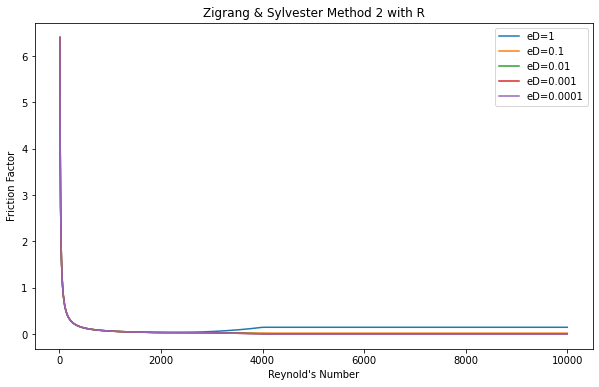

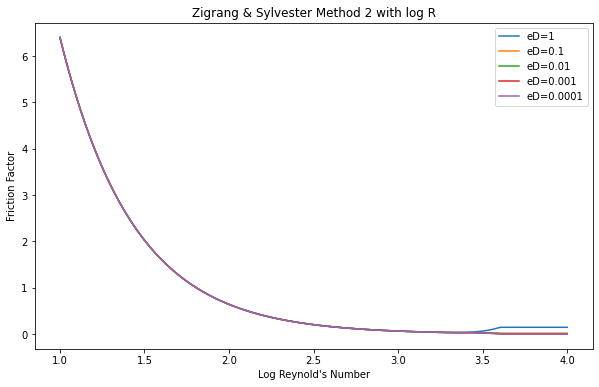

In [71]:
Ra=np.arange(10, 10000, .1);
k=0.01
d=1        

C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 2 with R')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Log Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Zigrang & Sylvester Method 2 with log R')
plt.legend()
plt.show()
                      

In [72]:
print(newDfObj)

               Method  RMS          Time
0             Laminar  NaN -9.570000e-08
1             Laminar  NaN -9.570000e-08
2          DP Clamond  NaN -3.278000e-07
3         SP. Clamond  NaN  2.805000e-07
4               Brkic  NaN  3.263980e-05
5          JainSwamee  NaN  2.701210e-05
6          Serghides1  NaN  2.882490e-05
7          Serghides2  NaN -1.407400e-06
8         Dobromyslov  NaN  1.291000e-07
9       GoudarSonnad1  NaN  3.145600e-06
10      GoudarSonnad2  NaN -3.616800e-06
11            Blasius  NaN  3.445830e-05
12            Haaland  NaN -8.810000e-07
13           Buzzelli  NaN -4.138200e-06
14                MRR  NaN  1.614020e-05
15              Moody  NaN  4.278000e-07
16          Vatankhan  NaN -5.786000e-07
17                EPT  NaN  3.342900e-05
18           RaoKumar  NaN  2.701000e-07
19           Mandilli  NaN  1.344500e-06
20          Nikuradse  NaN -6.849000e-07
21  ZigrangSylvester1  NaN -5.658000e-07
22  ZigrangSylvester2  NaN  3.444240e-05


In [73]:

newDfObj['-Log(abs[Time])'] = -1*np.log10(np.absolute(newDfObj.Time))
print(newDfObj)


               Method  RMS          Time  -Log(abs[Time])
0             Laminar  NaN -9.570000e-08         7.019088
1             Laminar  NaN -9.570000e-08         7.019088
2          DP Clamond  NaN -3.278000e-07         6.484391
3         SP. Clamond  NaN  2.805000e-07         6.552067
4               Brkic  NaN  3.263980e-05         4.486253
5          JainSwamee  NaN  2.701210e-05         4.568442
6          Serghides1  NaN  2.882490e-05         4.540232
7          Serghides2  NaN -1.407400e-06         5.851582
8         Dobromyslov  NaN  1.291000e-07         6.889074
9       GoudarSonnad1  NaN  3.145600e-06         5.502297
10      GoudarSonnad2  NaN -3.616800e-06         5.441676
11            Blasius  NaN  3.445830e-05         4.462706
12            Haaland  NaN -8.810000e-07         6.055024
13           Buzzelli  NaN -4.138200e-06         5.383189
14                MRR  NaN  1.614020e-05         4.792091
15              Moody  NaN  4.278000e-07         6.368759
16          Va

               Method  RMS          Time  -Log(abs[Time])
1             Laminar  NaN -9.570000e-08         7.019088
2          DP Clamond  NaN -3.278000e-07         6.484391
3         SP. Clamond  NaN  2.805000e-07         6.552067
4               Brkic  NaN  3.263980e-05         4.486253
5          JainSwamee  NaN  2.701210e-05         4.568442
6          Serghides1  NaN  2.882490e-05         4.540232
7          Serghides2  NaN -1.407400e-06         5.851582
8         Dobromyslov  NaN  1.291000e-07         6.889074
9       GoudarSonnad1  NaN  3.145600e-06         5.502297
10      GoudarSonnad2  NaN -3.616800e-06         5.441676
11            Blasius  NaN  3.445830e-05         4.462706
12            Haaland  NaN -8.810000e-07         6.055024
13           Buzzelli  NaN -4.138200e-06         5.383189
14                MRR  NaN  1.614020e-05         4.792091
15              Moody  NaN  4.278000e-07         6.368759
16          Vatankhan  NaN -5.786000e-07         6.237622
17            

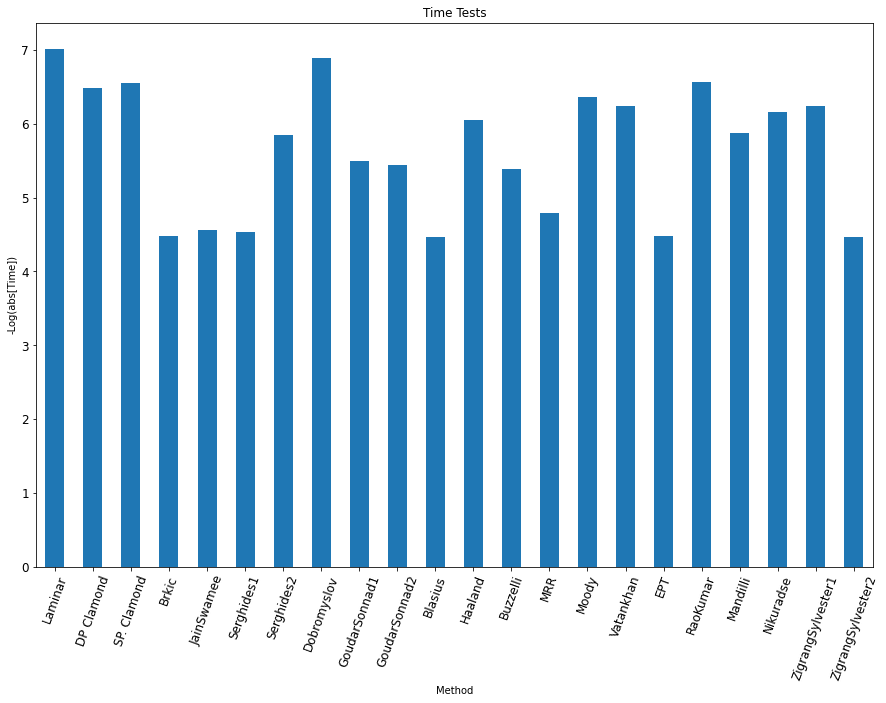

In [74]:
newdf2 = newDfObj.drop(index=0)
print(newdf2)
newdf2.plot.bar(x="Method", y="-Log(abs[Time])", rot=70, title="Time Tests", xlabel="Method", ylabel="-Log(abs[Time])", figsize=(15, 10), legend=False, fontsize=12)
plt.show()


In [75]:
newDfObj.to_csv(r'C:\Test3\Example2.csv')

In [76]:
newDfObj2['(abs[Time])/(min[Time])'] = np.absolute(newDfObj.Time)/(np.minimum(np.absolute(newDfObj.Time)))
print(newDfObj2)

TypeError: ufunc() missing 1 of 2required positional argument(s)